# Regularization

In [1]:
using Distributions
using LinearAlgebra
using Plots

## Polynomial Curve Fitting without Regularization

In [2]:
# Set Function to Generate Data
dist = Normal(0.0, 0.1)
base(x) = sin.(2pi*x)
gen(x) = base(x) + rand(dist, length(x))

gen (generic function with 1 method)

In [3]:
# Set Function to Generate Polynomial Matrix
function polynomial_matrix(x, N)
    m = length(x)
    X = fill(1.0, m)
    for j in 1:N
        x_vec = x .^ j
        X = hcat(X, x_vec)
    end
    return X
end

polynomial_matrix (generic function with 1 method)

In [4]:
# Set Function to Calculate Coefficient
function weight(x, y, N)
    X = polynomial_matrix(x, N)
    w = (X' * X) \ X' * y
    return w
end

weight (generic function with 1 method)

In [5]:
# Set Function to Output Value
function f(x, w)
    X = polynomial_matrix(x, length(w)-1)
    y = X * w
    return y
end

f (generic function with 1 method)

In [6]:
M = 9
N = 9
step = 1.0 / (M - 1)
x = collect(0.0:step:1.0)
y = gen(x)
println("x = ", x)
println("y = ", y)

x = [0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0]
y = [0.09096566410800691, 0.7115126850831132, 1.1032378844321429, 0.5760019280146614, 0.17807257437574098, -0.5645933565934109, -0.9964514760322031, -0.7531174249778707, -0.06353741591397337]


In [7]:
w = weight(x, y, N)
println("w = ", w)

w = [0.0909656684073994, -25.662568377255525, 542.4446401319873, -3368.0226895688606, 9165.80076875978, -9757.40840865084, -4801.82465409896, 21537.79165449718, -18895.631622829347, 5602.358377054697]


1-order
w = [0.7214685617756433, -1.3802502207743517]

2-order
w = [0.6797217870412402, -1.0939866225955874, -0.28626359817876423]

3-order
w = [0.03415651778186601, 10.03432897130407, -29.79781876432149, 19.674370110761814]

4-order
w = [0.05787000031107321, 9.049654839615119, -24.766043614314505, 11.580168074125607, 4.047101018318178]

5-order
w = [0.08497424058806154, 6.0175938272353875, 0.8203592077891104, -60.986917896117546, 87.31132715167834, -33.305690453396394]

6-order
w = [0.08419899137015113, 6.323972318175787, -2.965751239669375, -44.71288631234445, 55.88789218293789, -5.361987441159654, -9.314567670751536]

7-order
w = [0.08978644904237469, -6.144359732318608, 198.64164274418545, -1225.2726705227647, 3370.5764033058654, -4822.149849636656, 3481.5978902372076, -997.40355947375]

8-order
w = [0.09096565895459341, -39.126069376187516, 835.180635523726, -5892.426951282736, 20669.1539511731, -40461.87336481831, 44831.04393461519, -26257.007582618775, 6314.900943699395]

9-orde

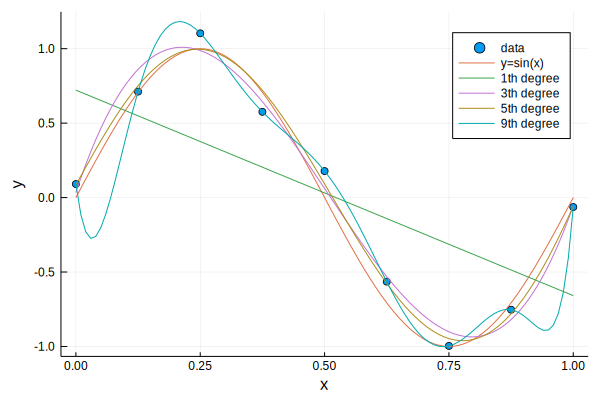

In [8]:
gr()
scatter(x, y, xlabel="x", ylabel="y", label="data")
graph_x = collect(0.0:0.01:1.0)
plot!(graph_x, base(graph_x), label=string("y=sin(x)"))
E_RMS_train = []
for d in 1:N
    w = weight(x, y, d)
    println(d, "-order")
    println("w = ", w, "\n")
    if N%d==0 || N%(d-1)==1
        plot!(graph_x, f(graph_x, w), label=string(d, "th degree"))
    end
    push!(E_RMS_train, sqrt(sum((y .- f(x, w)) .^2) / length(y)))
end
plot!()

In [9]:
test_x = rand(10000)
test_y = gen(test_x)

E_RMS_test = []
for d in 1:N
    w = weight(x, y, d)
    push!(E_RMS_test, sqrt(sum((test_y .- f(test_x, w)) .^2) / length(test_y)))
end

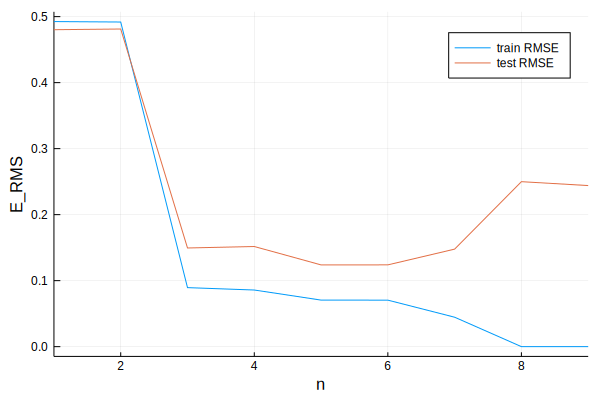

In [10]:
gr()
scatter(xlabel="n", ylabel="E_RMS")
graph_x = collect(1:N)
plot!(graph_x, E_RMS_train, xlim=(1, N), label=string("train RMSE"))
plot!(graph_x, E_RMS_test, xlim=(1, N), label=string("test RMSE"))

## Polynomial Curve Fitting with Regularization

In [11]:
# Set Function to Generate Data
dist = Normal(0.0, 0.1)
base(x) = sin.(2pi*x)
gen(x) = base(x) + rand(dist, length(x))

gen (generic function with 1 method)

In [12]:
# Set Function to Generate Polynomial Matrix
function polynomial_matrix(x, N)
    m = length(x)
    X = fill(1.0, m)
    for j in 1:N
        x_vec = x .^ j
        X = hcat(X, x_vec)
    end
    return X
end

polynomial_matrix (generic function with 1 method)

In [13]:
# Set Function to Calculate Coefficient
function weight(x, y, N, lambda_)
    X = polynomial_matrix(x, N)
    w = (X' * X + lambda_ * Matrix{Float64}(I, N+1, N+1)) \ X' * y
    return w
end

weight (generic function with 2 methods)

In [14]:
# Set Function to Output Value
function f(x, w)
    X = polynomial_matrix(x, length(w)-1)
    y = X * w
    return y
end

f (generic function with 1 method)

In [15]:
# Training Data
M = 9
N = 9
step = 1.0 / (M - 1)
x = collect(0.0:step:1.0)
y = gen(x)
println("x = ", x)
println("y = ", y)

x = [0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0]
y = [0.009284642148321285, 0.6266000304155765, 1.0829734756469445, 0.5746702177962506, 0.04673362937722349, -0.6529504623753781, -0.9080160173802349, -0.6336723719177104, 0.06855262715754244]


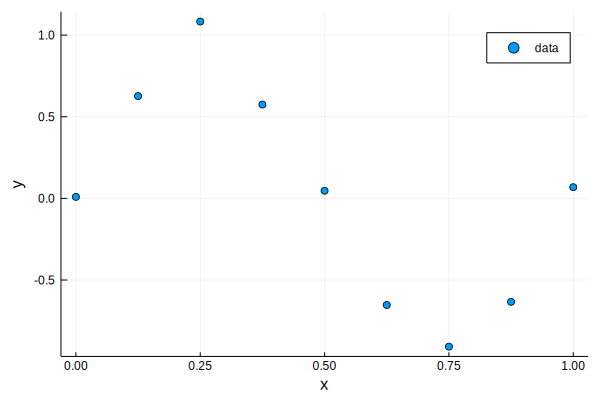

In [16]:
gr()
scatter(x, y, xlabel="x", ylabel="y", label="data")

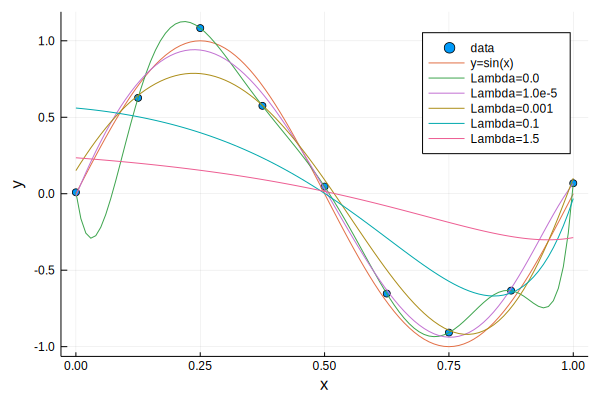

In [17]:
gr()
scatter(x, y, xlabel="x", ylabel="y", label="data")
graph_x = collect(0.0:0.01:1.0)
plot!(graph_x, base(graph_x), label=string("y=sin(x)"))
plot!(graph_x, f(graph_x, weight(x, y, N, 0.0)), label=string("Lambda=", 0.0))
plot!(graph_x, f(graph_x, weight(x, y, N, 0.00001)), label=string("Lambda=", 0.00001))
plot!(graph_x, f(graph_x, weight(x, y, N, 0.001)), label=string("Lambda=", 0.001))
plot!(graph_x, f(graph_x, weight(x, y, N, 0.1)), label=string("Lambda=", 0.1))
plot!(graph_x, f(graph_x, weight(x, y, N, 1.5)), label=string("Lambda=", 1.5))

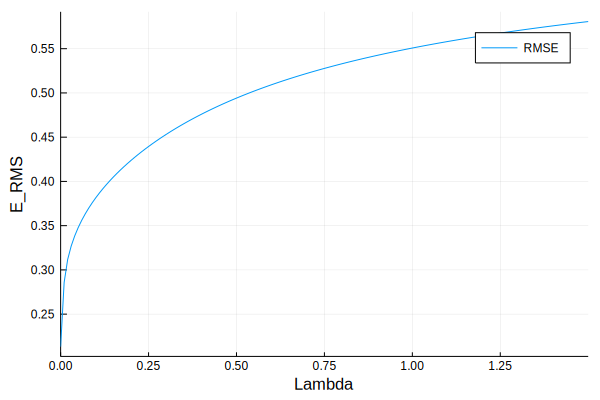

In [18]:
# Validation Data
valid_x = rand(10000)
valid_y = gen(valid_x)

graph_x = collect(0.0:0.01:1.5)
E_RMS = Array{Float64, 1}(undef, length(graph_x))
for (index, lambda_) in enumerate(graph_x)
    w = weight(x, y, N, lambda_)
    E_RMS[index] = sqrt(sum((valid_y .- f(valid_x, w)) .^2) / length(valid_y))
end

# Graph Plot
gr()
scatter(xlabel="Lambda", ylabel="E_RMS")
plot!(graph_x, E_RMS, xlim=(0.0, 1.5), label=string("RMSE"))

E_RMS=0.11303020938656388 (lambda=3.0e-7)


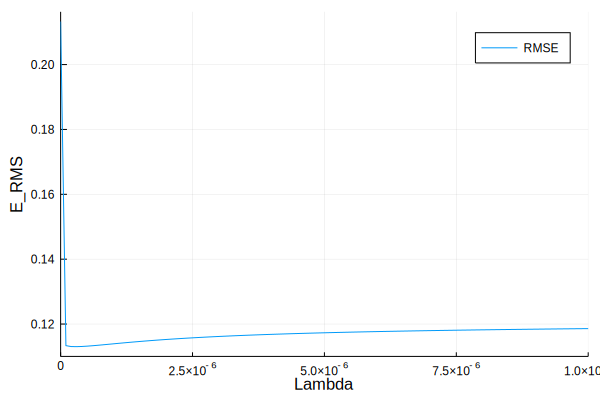

In [19]:
graph_x = collect(0.0:1.0e-7:1.0e-5)
E_RMS = Array{Float64, 1}(undef, length(graph_x))
for (index, lambda_) in enumerate(graph_x)
    w = weight(x, y, N, lambda_)
    E_RMS[index] = sqrt(sum((valid_y .- f(valid_x, w)) .^2) / length(valid_y))
end

# Get Minimum Value and Index
value, index = findmin(E_RMS)
lambda_min = graph_x[index]
println("E_RMS=$value (lambda=$lambda_min)")

# Graph Plot
gr()
scatter(xlabel="Lambda", ylabel="E_RMS")
plot!(graph_x, E_RMS, xlim=(0.0, 1.0e-5), label=string("RMSE"))

E_RMS=0.113027564639183
lambda=2.76e-7


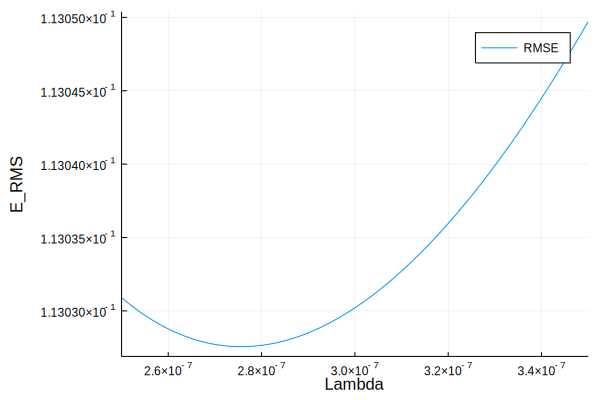

In [20]:
width_step = 10.0 ^ floor(log10(lambda_min))
left = lambda_min - 0.5 * width_step
right = lambda_min + 0.5 * width_step
step = width_step * 0.01

graph_x = collect(left:step:right)
E_RMS = Array{Float64, 1}(undef, length(graph_x))
for (index, lambda_) in enumerate(graph_x)
    w = weight(x, y, N, lambda_)
    E_RMS[index] = sqrt(sum((valid_y .- f(valid_x, w)) .^2) / length(valid_y))
end

# Get Minimum Value and Index
value, index = findmin(E_RMS)
lambda_const = graph_x[index]
println("E_RMS=", value)
println("lambda=", lambda_const)

# Graph Plot
gr()
scatter(xlabel="Lambda", ylabel="E_RMS")
plot!(graph_x, E_RMS, xlim=(left, right), label=string("RMSE"))

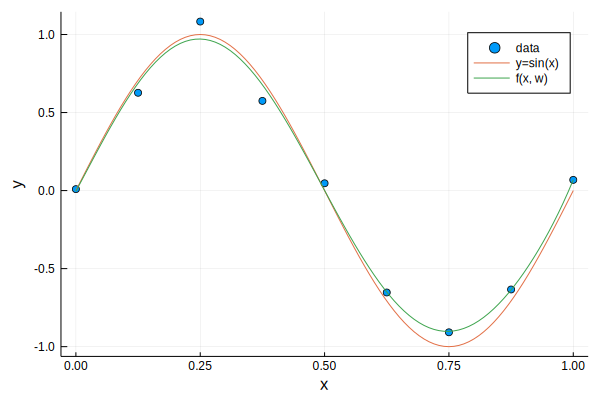

In [21]:
gr()
scatter(x, y, xlabel="x", ylabel="y", label="data")
graph_x = collect(0.0:0.01:1.0)
w = weight(x, y, N, lambda_const)
plot!(graph_x, base(graph_x), label=string("y=sin(x)"))
plot!(graph_x, f(graph_x, w), label=string("f(x, w)"))

In [22]:
# Test Data
test_x = rand(10000)
test_y = gen(test_x)
E_RMS_test = sqrt(sum((test_y .- f(test_x, w)) .^2) / length(test_y))
println("E_RMS=", E_RMS_test)

E_RMS=0.11245226067468156
